In [1]:
from fastai import *
from fastai.vision import *

In [2]:
folder = 'soccer'
file = 'urls_soccer.txt'

In [3]:
folder = 'american'
file = 'urls_american.txt'

In [4]:
path = Path('../../data/football')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [5]:
classes = ['soccer', 'american']

In [10]:
download_images(path/file, dest, max_pics=200)

Error https://cloud.rampinteractive.com/kelownayouthsoccer/files/div%20a.jpg HTTPSConnectionPool(host='cloud.rampinteractive.com', port=443): Max retries exceeded with url: /kelownayouthsoccer/files/div%20a.jpg (Caused by SSLError(SSLError("bad handshake: Error([('SSL routines', 'tls_process_server_certificate', 'certificate verify failed')])")))
Error https://www.soccer.com/wcm/connect/5f0b0e03-9c96-40f6-a0bc-0c830df30e31/17390_SIDEKICKS-2UP-MEGAMENU.jpg?MOD=AJPERES&CACHEID=ROOTWORKSPACE-5f0b0e03-9c96-40f6-a0bc-0c830df30e31-mm9SgnZ HTTPSConnectionPool(host='www.soccer.com', port=443): Read timed out. (read timeout=4)
Error https://www.washingtonpost.com/resizer/NmHZSZbNDpBIgdkyJn5R7MAFl7s=/480x0/arc-anglerfish-washpost-prod-washpost.s3.amazonaws.com/public/W6XXEWJAIQZUJPGAQQCVMLRYB4.jpg HTTPSConnectionPool(host='www.washingtonpost.com', port=443): Read timed out. (read timeout=4)
Error https://content.computicket.com/bl/files/content-images/soccer_2.jpg HTTPSConnectionPool(host='conte

In [6]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

soccer


american


In [7]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [8]:
data.classes

['american', 'soccer']

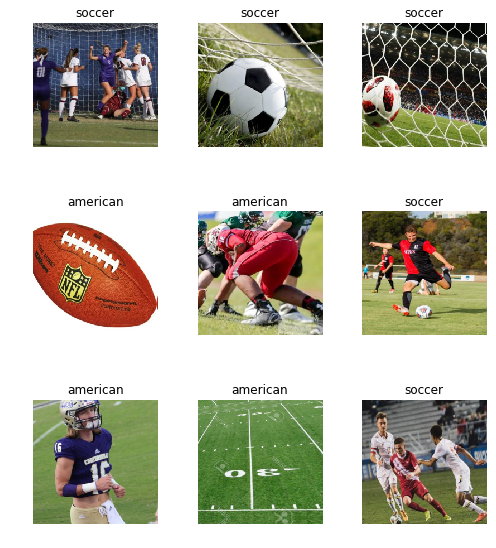

In [9]:
data.show_batch(rows=3, figsize=(7,8))

In [10]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['american', 'soccer'], 2, 292, 72)

In [11]:
learn = create_cnn(data, models.resnet34, metrics=[accuracy, error_rate])

In [12]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,error_rate
1,0.858293,0.576823,0.694444,0.305556
2,0.555427,0.148816,0.958333,0.041667
3,0.422660,0.086652,0.958333,0.041667
4,0.350025,0.079050,0.958333,0.041667


In [13]:
learn.save('stage-1')

In [14]:
learn.freeze()

In [15]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


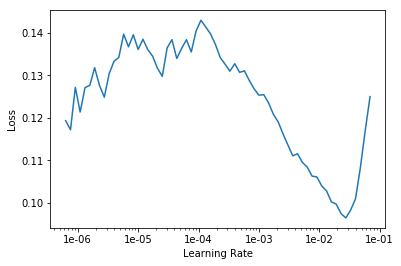

In [16]:
learn.recorder.plot()

In [17]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

epoch,train_loss,valid_loss,accuracy,error_rate
1,0.107597,0.072975,0.958333,0.041667
2,0.107215,0.072475,0.958333,0.041667


In [18]:
learn.save('stage-2')

In [19]:
learn.load('stage-2');

In [20]:
interp = ClassificationInterpretation.from_learner(learn)

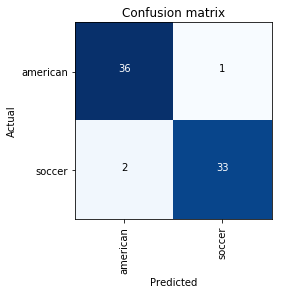

In [21]:
interp.plot_confusion_matrix()

In [22]:
from fastai.widgets import *

In [23]:
ds, idxs = DatasetFormatter().from_toplosses(learn, ds_type=DatasetType.Valid)

TypeError: get_toplosses_idxs() got multiple values for argument 'ds_type'